In [63]:
import pandas as pd
import numpy as nd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

In [50]:
cluster=pd.read_csv("clean_credit_data.csv")

In [51]:
cluster=cluster.drop(["Unnamed: 0"],axis=1)

In [52]:
cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Annual_Income                  100000 non-null  float64
 1   Monthly_Inhand_Salary          100000 non-null  float64
 2   Num_Bank_Accounts              100000 non-null  int64  
 3   Num_Credit_Card                100000 non-null  int64  
 4   Interest_Rate                  100000 non-null  int64  
 5   Num_of_Loan                    100000 non-null  int64  
 6   Delay_from_due_date            100000 non-null  int64  
 7   Num_of_Delayed_Payment         100000 non-null  int64  
 8   Changed_Credit_Limit           100000 non-null  float64
 9   Num_Credit_Inquiries           100000 non-null  float64
 10  Outstanding_Debt               100000 non-null  float64
 11  Credit_Utilization_Ratio       100000 non-null  float64
 12  Credit_History_Age             

Encoding categorical column

In [53]:
cluster["Credit_Score"] = cluster["Credit_Score"].map({"Standard": 1, 
                               "Good": 2, 
                               "Poor": 0})

In [54]:
cluster

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,...,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,encoded_ Credit_Mix,encoded_Occupation,encoded_Payment_of_Min_Amount,encoded_Payment_Behaviour,encoded_ Type_of_Loan
0,19114.120000,1824.843333,3,4,3,4,3,7,11.27000,4.0,...,265,49.574949,21.465380,312.494089,2,1,12,1,2,128
1,19114.120000,1824.843333,3,4,3,4,3,4,11.27000,4.0,...,266,49.574949,21.465380,284.629163,2,1,12,1,3,128
2,19114.120000,1824.843333,3,4,3,4,3,7,11.27000,4.0,...,267,49.574949,21.465380,331.209863,2,1,12,1,4,128
3,50516.683187,1824.843333,3,4,3,4,5,4,6.27000,4.0,...,268,49.574949,21.465380,223.451310,2,1,12,1,5,128
4,50516.683187,1824.843333,3,4,3,4,6,4,10.47076,4.0,...,269,49.574949,21.465380,341.489231,2,1,12,1,1,128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,39628.990000,3359.415833,4,6,7,2,23,7,11.50000,3.0,...,378,35.104023,24.028477,479.866228,0,1,9,1,0,683
99996,39628.990000,3359.415833,4,6,7,2,18,7,11.50000,3.0,...,379,35.104023,24.028477,496.651610,0,1,9,1,1,683
99997,39628.990000,3359.415833,4,6,7,2,27,6,11.50000,3.0,...,380,35.104023,24.028477,516.809083,0,1,9,1,0,683
99998,39628.990000,3359.415833,4,6,7,2,20,6,11.50000,3.0,...,381,35.104023,24.028477,319.164979,1,1,9,1,3,683


In [11]:
cluster.columns

Index(['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance', 'Credit_Score', 'encoded_ Credit_Mix',
       'encoded_Occupation', 'encoded_Payment_of_Min_Amount',
       'encoded_Payment_Behaviour', 'encoded_ Type_of_Loan'],
      dtype='object')

In [55]:
# Scaling the Numerical columns
scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster)
cluster_scaled

array([[-0.83315895, -0.75480582, -0.91343801, ..., -0.58148974,
        -0.40945462, -1.78858703],
       [-0.83315895, -0.75480582, -0.91343801, ..., -0.58148974,
         0.12779574, -1.78858703],
       [-0.83315895, -0.75480582, -0.91343801, ..., -0.58148974,
         0.66504611, -1.78858703],
       ...,
       [-0.28320956, -0.26087555, -0.52782914, ..., -0.58148974,
        -1.48395534, -1.46493604],
       [-0.28320956, -0.26087555, -0.52782914, ..., -0.58148974,
         0.12779574, -1.46493604],
       [-0.28320956, -0.26087555, -0.52782914, ..., -0.58148974,
        -0.94670498, -1.46493604]])

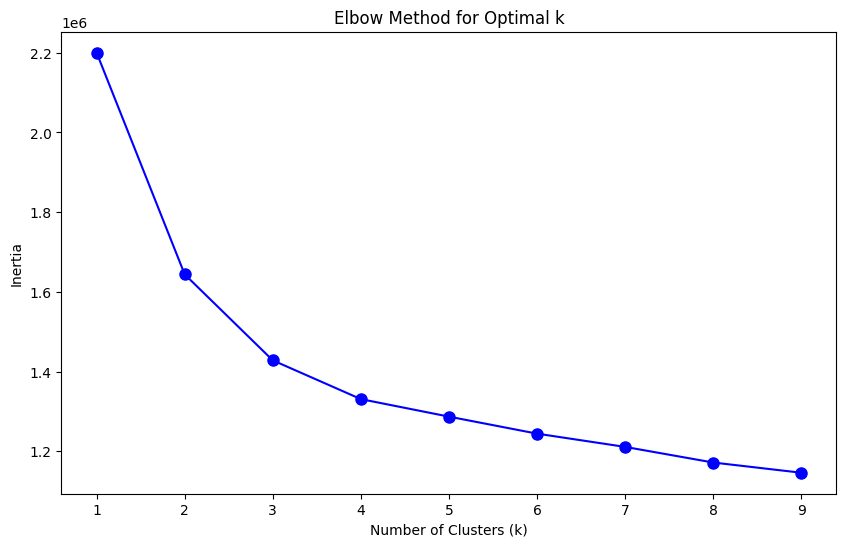

In [56]:
# Range of k values to test
k_values = range(1,10)
inertia = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cluster_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, 'bo-', markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [57]:
# Choosing the number of cluster as 4 based on elbow method
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(cluster_scaled)
cluster_labels

array([2, 2, 2, ..., 2, 2, 2])

In [58]:
cluster['Cluster_Labels'] = cluster_labels
cluster['Cluster_Labels'] = cluster["Cluster_Labels"].map({0:'Cluster 1', 1:'Cluster 2', 2:'Cluster 3',3:'Cluster 4'})

cluster['Cluster_Labels'].value_counts()

Cluster_Labels
Cluster 3    28176
Cluster 4    25096
Cluster 1    24332
Cluster 2    22396
Name: count, dtype: int64

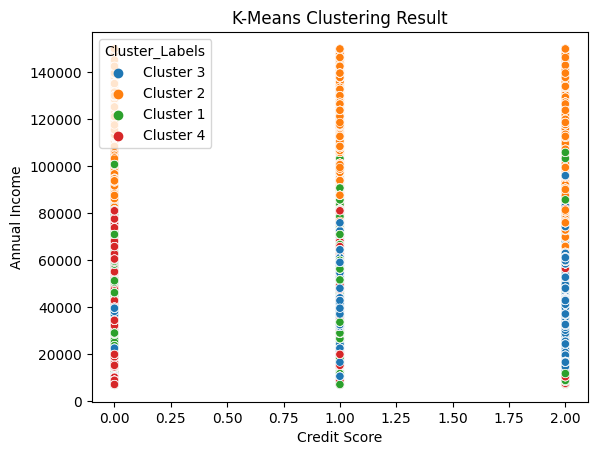

In [59]:
# Create a scatter plot with different colors for each cluster using hue
sns.scatterplot(x='Credit_Score', y='Annual_Income', hue='Cluster_Labels', data=cluster)
plt.xlabel('Credit Score')
plt.ylabel('Annual Income')
plt.title('K-Means Clustering Result')
plt.show()

In [28]:
cluster["Cluster_Labels"]

0        Cluster 3
1        Cluster 3
2        Cluster 3
3        Cluster 3
4        Cluster 3
           ...    
99995    Cluster 3
99996    Cluster 3
99997    Cluster 3
99998    Cluster 3
99999    Cluster 3
Name: Cluster_Labels, Length: 100000, dtype: object

In [60]:
cluster["Cluster_Labels"] = cluster["Cluster_Labels"].map({"Cluster 1": 1, 
                               "Cluster 2": 2, 
                               "Cluster 3": 3,
                               "Cluster 4":4})

In [61]:
cluster["Cluster_Labels"].unique()

array([3, 2, 1, 4], dtype=int64)

Checking for NaN values:
Annual_Income                    0
Monthly_Inhand_Salary            0
Num_Bank_Accounts                0
Num_Credit_Card                  0
Interest_Rate                    0
Num_of_Loan                      0
Delay_from_due_date              0
Num_of_Delayed_Payment           0
Changed_Credit_Limit             0
Num_Credit_Inquiries             0
Outstanding_Debt                 0
Credit_Utilization_Ratio         0
Credit_History_Age               0
Total_EMI_per_month              0
Amount_invested_monthly          0
Monthly_Balance                  0
Credit_Score                     0
encoded_ Credit_Mix              0
encoded_Occupation               0
encoded_Payment_of_Min_Amount    0
encoded_Payment_Behaviour        0
encoded_ Type_of_Loan            0
Cluster_Labels                   0
dtype: int64


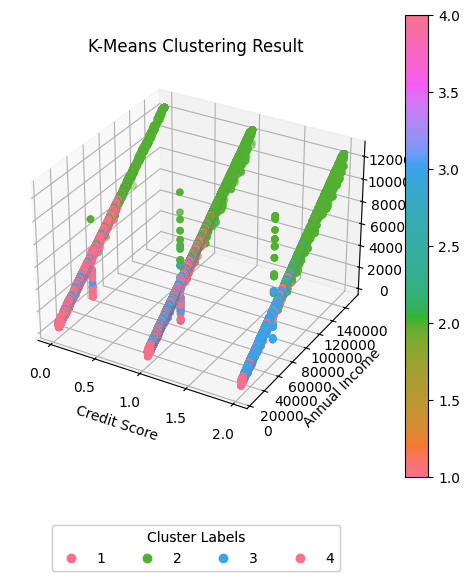

In [62]:
# Check for NaN values
print("Checking for NaN values:")
print(cluster.isna().sum())

# Drop rows with NaN values
cluster = cluster.dropna()

# Check if the DataFrame is empty after dropping NaNs
if cluster.empty:
    print("The DataFrame is empty after dropping NaN values.")
else:
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, projection="3d")

    # get colormap from seaborn
    cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

    sc = ax.scatter(cluster['Credit_Score'], cluster['Annual_Income'], cluster['Monthly_Inhand_Salary'], c=cluster['Cluster_Labels'], cmap=cmap)
    plt.colorbar(sc)
    ax.set_xlabel('Credit Score')
    ax.set_ylabel('Annual Income')
    ax.set_zlabel('Monthly Inhand Salary')
    plt.title('K-Means Clustering Result')

    # produce a legend with the unique colors from the scatter
    legend = ax.legend(*sc.legend_elements(), loc="lower center", title="Cluster Labels", borderaxespad=-10, ncol=4)
    ax.add_artist(legend)

    # save
    plt.savefig("scatter_hue.png", bbox_inches='tight')
    plt.show()
